# Examples of Persistence Diagrams

We now understand the pipeline for creating a persistence diagram from a dataset:
In this notebook, we will look at a few more examples of persistence diagrams generated from toy datasets and make sense out of them.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from sklearn.metrics import pairwise_distances

import gudhi as gd

## Some 2-Dimensional Datasets

Let's look at a dataset consisting of a pair of circles in the plane. We can parameterize our example by including a variable radius and offset parameter. One circle will always be radius 1, centered at the origin. The other circle will be variable. We can also include variable noise terms.

In [10]:
def create_circle_data(radius, x_offset, noise1 = 0.5, noise2 = 0.5, num_points1 = 50, num_points2 = 50):
    
    A = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points1)
    A = A.T/np.linalg.norm(A,axis = 1)
    A = A.T + noise1*np.random.rand(num_points1,2)

    B = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points2)
    B = radius*B.T/np.linalg.norm(B,axis = 1)
    B = B.T + noise2*np.random.rand(num_points2,2) + [x_offset,0]

    X = np.concatenate((A,B))
    
    return X

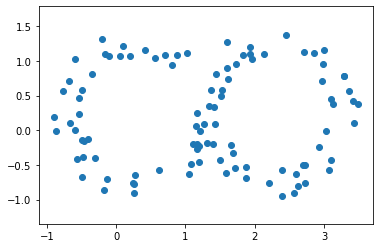

In [11]:
X = create_circle_data(1,2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

The following function will take a point cloud and produce either barcodes or persistence diagrams.

In [10]:
def visualize_persistent_homology(X, style = 'barcodes', max_dimension = 2):

    """
    In: X is a Euclidean point cloud of size [num_points,dimension]
        style = 'barcodes' or 'diagrams'
        max_dimension = highest dimensional skeleton of the VR complex to compute. Highest degree
        persistent homology will be one less than this.
    Out: plots either persistence barcodes or persistence diagrams
    """
    
    D = pairwise_distances(X)
    skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
    Rips_complex = skeleton.create_simplex_tree(max_dimension = max_dimension)
    BarCodes = Rips_complex.persistence()

    if style == 'barcodes':
        for dim in range(max_dimension):
            print('Dimension',dim)
            plt.figure()
            gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == dim])
            plt.show()
    elif style == 'diagrams':
        plt.figure()
        gd.plot_persistence_diagram(BarCodes)
        plt.show()
            
    return

Let's test it:

Dimension 0


<Figure size 432x288 with 0 Axes>

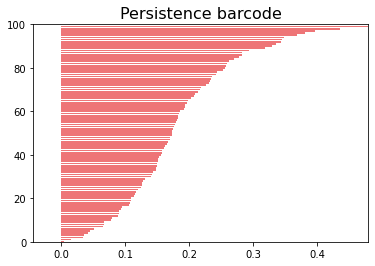

Dimension 1


<Figure size 432x288 with 0 Axes>

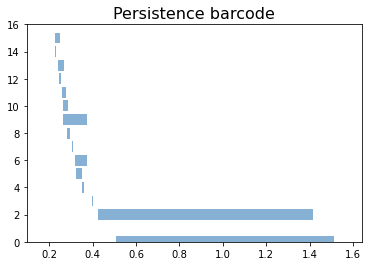

In [13]:
visualize_persistent_homology(X)

<Figure size 432x288 with 0 Axes>

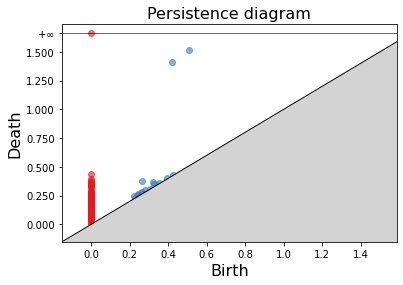

In [14]:
visualize_persistent_homology(X, style = 'diagrams')

Now we can try this on different point clouds and see if the results make sense.

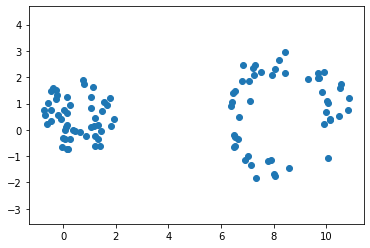

Dimension 0


<Figure size 432x288 with 0 Axes>

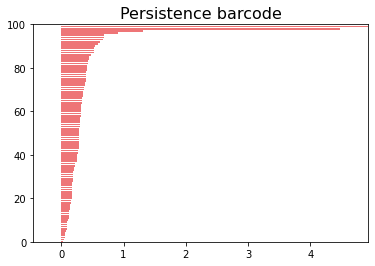

Dimension 1


<Figure size 432x288 with 0 Axes>

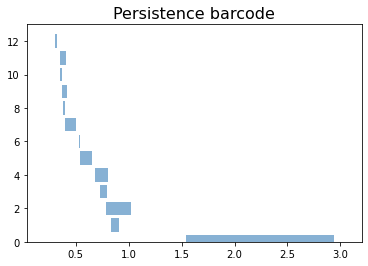

<Figure size 432x288 with 0 Axes>

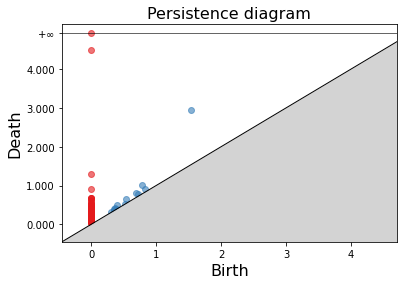

In [15]:
# Pick parameters:
radius = 2
x_offset = 8
noise1 = 1
noise2 = 1
num_points1 = 50
num_points2 = 50

X = create_circle_data(radius,x_offset,noise1 = noise1, noise2 = noise2, num_points1 = num_points1, num_points2 = num_points2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

visualize_persistent_homology(X)

visualize_persistent_homology(X, style = 'diagrams')

## Project

flow
<class 'numpy.ndarray'>
(21542,)
obs_tas
<class 'numpy.ndarray'>
(21546, 9)
flow_dates
<class 'pandas.core.series.Series'>
(21542,)
obs_lon_lat
<class 'list'>
(2,)
obs_pr
<class 'numpy.ndarray'>
(21546, 9)
obs_dates
<class 'pandas.core.series.Series'>
(21546,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21542 entries, 0 to 21541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   flow        21542 non-null  float64       
 1   flow_dates  21542 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21546 entries, 0 to 21545
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   obs_tas_1  21546 non-null  float64       
 1   obs_tas_2  21546 non-null  float64       
 2   obs_tas_3  21546 non-null  float64       
 3   obs_tas_4  21546 non-nul

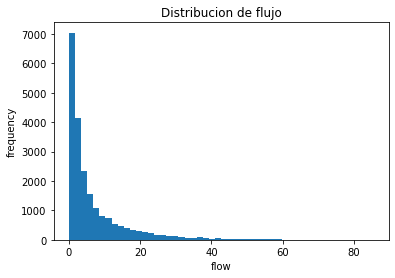

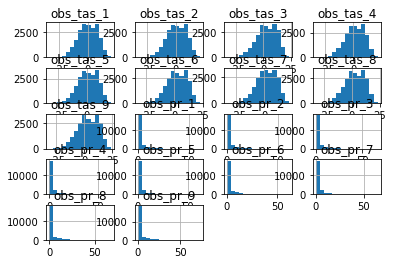

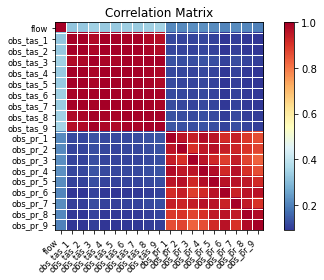

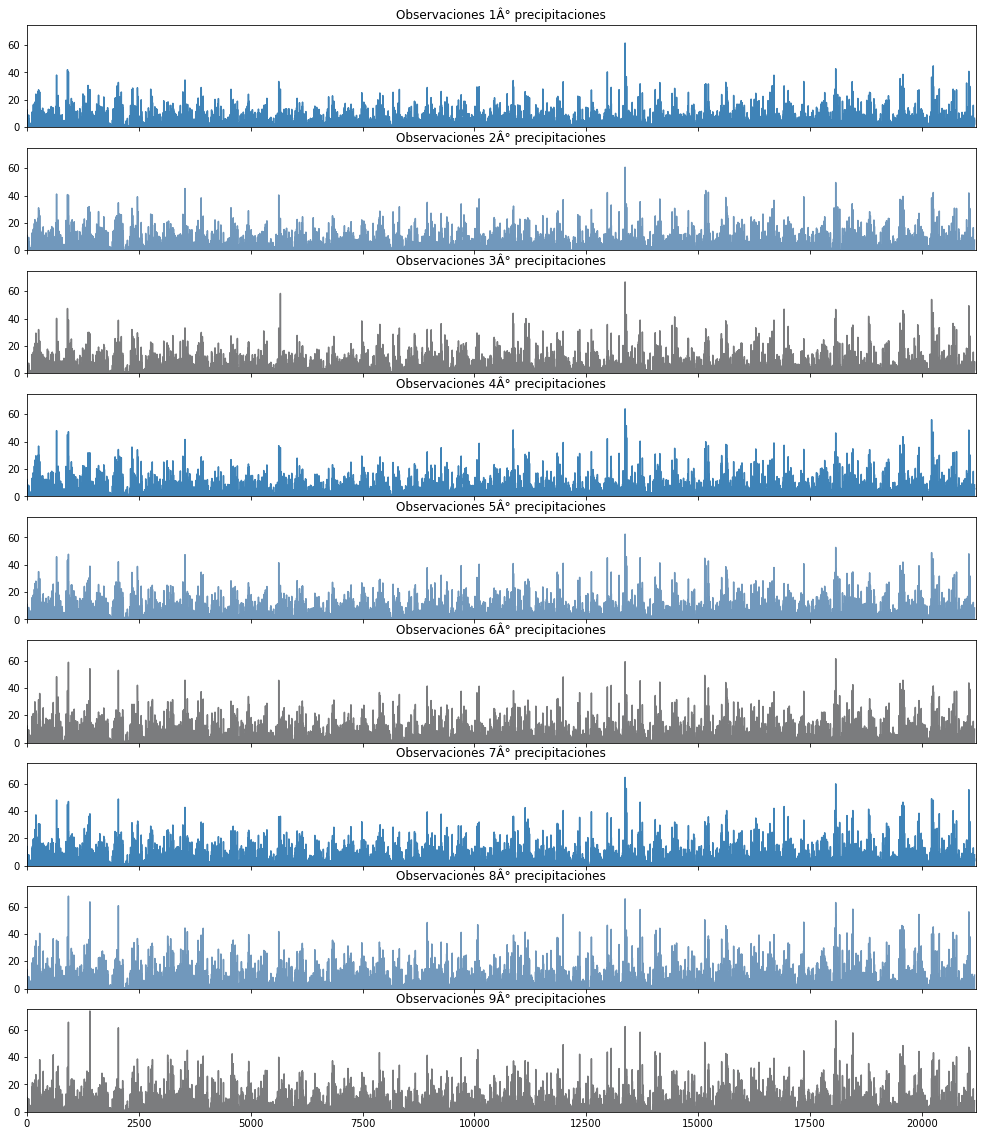

flow
<class 'numpy.ndarray'>
(21542,)
obs_tas
<class 'numpy.ndarray'>
(21546, 9)
flow_dates
<class 'pandas.core.series.Series'>
(21542,)
obs_lon_lat
<class 'list'>
(2,)
obs_pr
<class 'numpy.ndarray'>
(21546, 9)
obs_dates
<class 'pandas.core.series.Series'>
(21546,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21542 entries, 0 to 21541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   flow        21542 non-null  float64       
 1   flow_dates  21542 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.7 KB


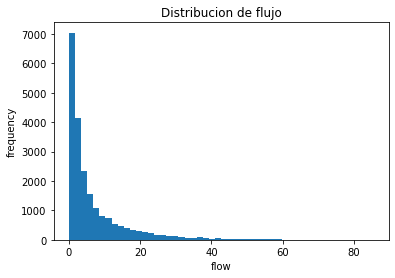

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21546 entries, 0 to 21545
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   obs_tas_1  21546 non-null  float64       
 1   obs_tas_2  21546 non-null  float64       
 2   obs_tas_3  21546 non-null  float64       
 3   obs_tas_4  21546 non-null  float64       
 4   obs_tas_5  21546 non-null  float64       
 5   obs_tas_6  21546 non-null  float64       
 6   obs_tas_7  21546 non-null  float64       
 7   obs_tas_8  21546 non-null  float64       
 8   obs_tas_9  21546 non-null  float64       
 9   obs_pr_1   21546 non-null  float64       
 10  obs_pr_2   21546 non-null  float64       
 11  obs_pr_3   21546 non-null  float64       
 12  obs_pr_4   21546 non-null  float64       
 13  obs_pr_5   21546 non-null  float64       
 14  obs_pr_6   21546 non-null  float64       
 15  obs_pr_7   21546 non-null  float64       
 16  obs_pr_8   21546 non-null  float64      

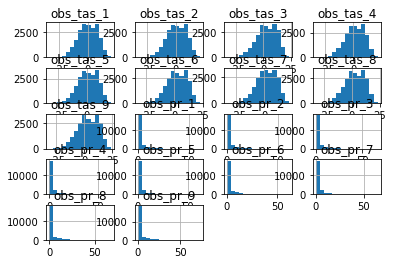

La fecha del registro 8777 no está en los datos de temperaturas y precipitaciones.
La fecha del registro 9495 no está en los datos de temperaturas y precipitaciones.
La fecha del registro 10723 no está en los datos de temperaturas y precipitaciones.
(21178, 2)
(21178, 19)


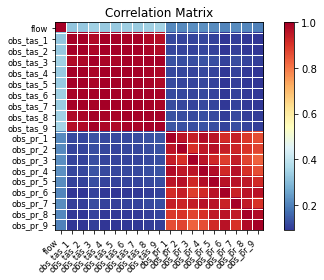

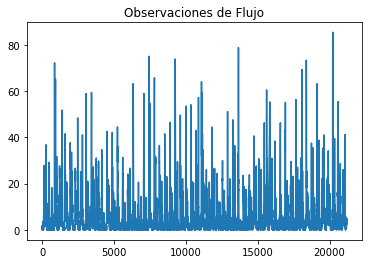

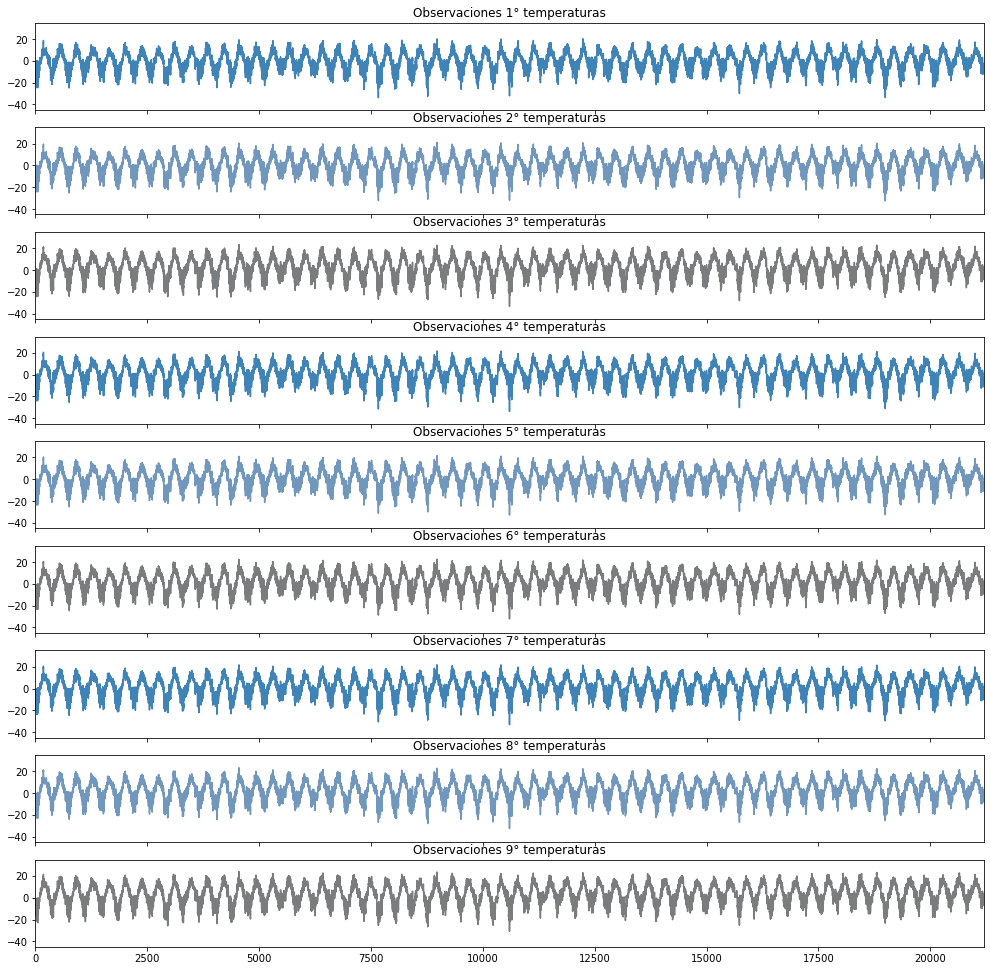

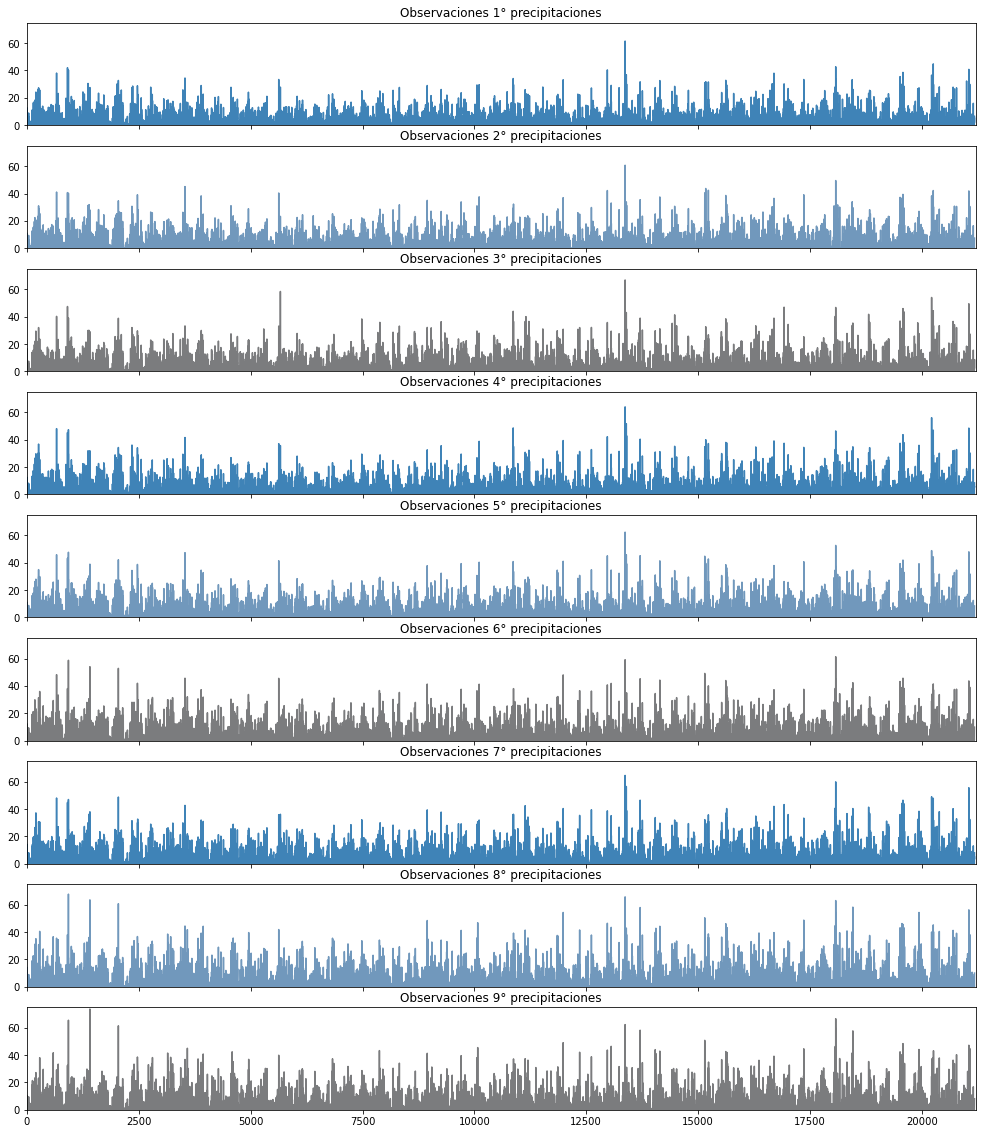

In [1]:
import ipynb.fs.full.Analisis
%run Analisis.ipynb

In [8]:
#Filtro de datos año 2012 a 2015 flujo y temperaturas
X=full_data.iloc[:,[0,1]]
X=X.to_numpy()
X=X[20083:21178]

In [ ]:
visualize_persistent_homology(X)

In [ ]:
visualize_persistent_homology(X, style = 'diagrams')

In [6]:
#Filtro de datos año 2012 a 2015 flujo y precipitaciones
X2=full_data.iloc[:,[0,10]]
X2=X2.to_numpy()
X2=X2[20083:21178]

In [ ]:
visualize_persistent_homology(X2)

In [ ]:
visualize_persistent_homology(X2, style = 'diagrams')

In [7]:
#Filtro de datos año 2014 a 2015 flujo, temperaturas y precipitaciones
X3=full_data.iloc[:,[0,1,10]]
X3=X3.to_numpy()
X3=X3[20813:21178]

In [ ]:
visualize_persistent_homology(X3)

In [ ]:
visualize_persistent_homology(X3, style = 'diagrams')